# **Logistic Regression Model, KFold**
---
##Author: Emmanuel Paalam
##Dataset has 13119 rows and 212 columns. No preprocessing
## V4: Simple imputation
##Target variable: F3EVERDO

##Import data

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount("/content/drive")
## Insert pathway to dataset below
df = pd.read_csv("/content/drive/My Drive/research/SURP 2024/colab/data/processed/epaalam-SIMPLEprocessed_els_02_12_byf3pststu_v1_0.csv")

Mounted at /content/drive


In [ ]:
df.dropna(inplace=True)
df.shape

(13119, 212)

## Split data

In [ ]:
y = df['F3EVERDO']
y.shape

(13119,)

In [ ]:
X = df.drop(columns='F3EVERDO', axis=1)
X.shape

(13119, 211)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58, stratify=y)
print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(10495, 211), (2624, 211), (10495,), (2624,)


## Make model

###Set number of folds

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=36)

###Make logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression(max_iter=1000, penalty='none')

### Perform cross-validation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Initialize lists to store metrics
acc_scores = []
ppv_scores = []
npv_scores = []
spec_scores = []
sens_scores = []
f1_scores = []
roc_auc_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = model.predict(X_val_fold)

    # Calculate evaluation metrics
    acc_scores.append(accuracy_score(y_val_fold, y_val_pred))
    ppv_scores.append(precision_score(y_val_fold, y_val_pred))
    npv_scores.append(confusion_matrix(y_val_fold, y_val_pred)[0, 0] / (confusion_matrix(y_val_fold, y_val_pred)[0, 0] + confusion_matrix(y_val_fold, y_val_pred)[1, 0]))
    spec_scores.append(confusion_matrix(y_val_fold, y_val_pred)[0, 0] / (confusion_matrix(y_val_fold, y_val_pred)[0, 0] + confusion_matrix(y_val_fold, y_val_pred)[0, 1]))
    sens_scores.append(recall_score(y_val_fold, y_val_pred))
    f1_scores.append(f1_score(y_val_fold, y_val_pred))
    roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_pred))

# Print average evaluation metrics over all folds
print(f'Average Accuracy: {sum(acc_scores)/len(acc_scores)}')
print(f'Average Precision (PPV): {sum(ppv_scores)/len(ppv_scores)}')
print(f'Average NPV: {sum(npv_scores)/len(npv_scores)}')
print(f'Average Specificity: {sum(spec_scores)/len(spec_scores)}')
print(f'Average Sensitivity: {sum(sens_scores)/len(sens_scores)}')
print(f'Average F1-Score: {sum(f1_scores)/len(f1_scores)}')
print(f'Average ROC-AUC: {sum(roc_auc_scores)/len(roc_auc_scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/d

Average Accuracy: 0.9337779895188184
Average Precision (PPV): 0.7479199949847722
Average NPV: 0.9486637131688982
Average Specificity: 0.9792057819216196
Average Sensitivity: 0.5363396760930891
Average F1-Score: 0.624202535937181
Average ROC-AUC: 0.7577727290073542


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predict on testing set

In [ ]:
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Confusion matrix for testing data
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate specificity and negative predictive value for testing data
test_specificity = tn_test / (tn_test + fp_test)
test_npv = tn_test / (tn_test + fn_test)

# Print the evaluation metrics for testing data
print('Evaluation metrics for testing data:')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision (PPV): {test_precision}')
print(f'Test Recall (Sensitivity): {test_recall}')
print(f'Test F1-Score: {test_f1}')
print(f'Test ROC-AUC: {test_roc_auc}')
print(f'Test Specificity: {test_specificity}')
print(f'Test Negative Predictive Value (NPV): {test_npv}')

Evaluation metrics for testing data:
Test Accuracy: 0.9355945121951219
Test Precision (PPV): 0.7537688442211056
Test Recall (Sensitivity): 0.5555555555555556
Test F1-Score: 0.6396588486140724
Test ROC-AUC: 0.767369961295195
Test Specificity: 0.9791843670348344
Test Negative Predictive Value (NPV): 0.9505154639175257


Confusion Matrix:
[[2305   49]
 [ 120  150]]


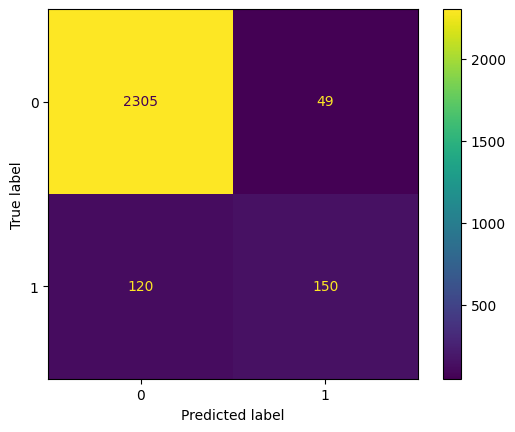

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

print("Confusion Matrix:")
print(cm)